In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column', None)

pl=pd.read_csv('people.csv.zip')
ac=pd.read_csv('act_train.csv.zip')
pl['date']=pd.to_datetime(pl['date'])
ac['date']=pd.to_datetime(ac['date'])
pl_columns=[]
for col in pl.columns:
    if 'char' in col or 'date' in col:
        pl_columns.append('pl_' + col)
    else:
        pl_columns.append(col)
pl.columns=pl_columns
ac_columns=[]
for col in ac.columns:
    if 'char' in col or 'date' in col:
        ac_columns.append('act_' + col)
    else:
        ac_columns.append(col)
ac.columns=ac_columns
ac_pl_merge = pd.merge(ac, pl, on='people_id')

ac_pl_merge.head(10)

,people_id,activity_id,act_date,activity_category,act_char_1,act_char_2,act_char_3,act_char_4,act_char_5,act_char_6,act_char_7,act_char_8,act_char_9,act_char_10,outcome,pl_char_1,group_1,pl_char_2,pl_date,pl_char_3,pl_char_4,pl_char_5,pl_char_6,pl_char_7,pl_char_8,pl_char_9,pl_char_10,pl_char_11,pl_char_12,pl_char_13,pl_char_14,pl_char_15,pl_char_16,pl_char_17,pl_char_18,pl_char_19,pl_char_20,pl_char_21,pl_char_22,pl_char_23,pl_char_24,pl_char_25,pl_char_26,pl_char_27,pl_char_28,pl_char_29,pl_char_30,pl_char_31,pl_char_32,pl_char_33,pl_char_34,pl_char_35,pl_char_36,pl_char_37,pl_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
5,ppl_100,act2_898576,2023-08-04,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1727,0,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
6,ppl_100002,act2_1233489,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
7,ppl_100002,act2_1623405,2022-11-23,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
8,ppl_100003,act2_1111598,2023-02-07,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
9,ppl_100003,act2_1177453,2023-06-28,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99


In [161]:
# # ac.head(20)
# pl.char_38.unique()
# pl.char_38.min() , pl.char_38.max(), pl.char_38.mean(), pl.char_38.median()

ac.columns

Index(['people_id', 'activity_id', 'act_date', 'activity_category',
       'act_char_1', 'act_char_2', 'act_char_3', 'act_char_4', 'act_char_5',
       'act_char_6', 'act_char_7', 'act_char_8', 'act_char_9', 'act_char_10',
       'outcome'],
      dtype='object')

In [104]:
# ac.loc[ac.people_id == 'ppl_100']
pl.group_1.nunique()

34224

In [4]:
# pl.info()
# pl.char_38.unique()
# ac.columns
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197291 entries, 0 to 2197290
Data columns (total 15 columns):
people_id            object
activity_id          object
date                 datetime64[ns]
activity_category    object
char_1               object
char_2               object
char_3               object
char_4               object
char_5               object
char_6               object
char_7               object
char_8               object
char_9               object
char_10              object
outcome              int64
dtypes: datetime64[ns](1), int64(1), object(13)
memory usage: 251.5+ MB


In [5]:
ac.activity_category.unique()
ac.outcome.unique()
ac['date'].max(), ac['date'].min(), pl['date'].max(), pl['date'].min()
# ac.columns

(Timestamp('2023-08-31 00:00:00'),
 Timestamp('2022-07-17 00:00:00'),
 Timestamp('2023-08-31 00:00:00'),
 Timestamp('2020-05-18 00:00:00'))

Text(0.5, 1.0, 'Char_38')

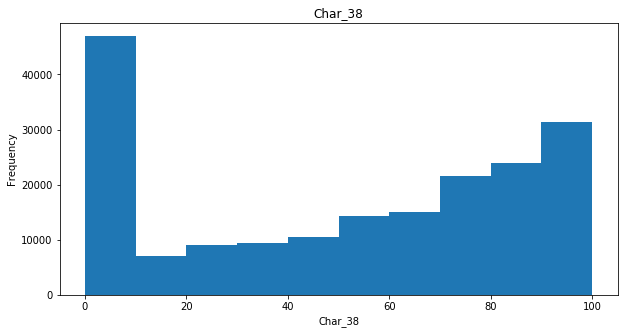

In [6]:
pl.char_38.plot(kind='hist',figsize=(10,5))
plt.xlabel('Char_38')
plt.ylabel('Frequency')
plt.title('Char_38')

(array([587161.,  49644.,  65930., 101104.,  88821.,  66710.,  71624.,
         71876.,  54474.,  64450.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

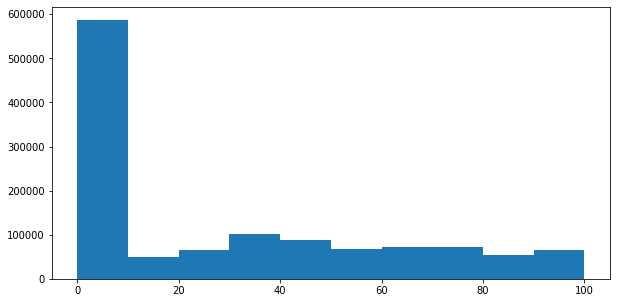

In [7]:
pl.columns
pl_char_38=pl[['people_id', 'char_38']]
ac_outcome=ac[['people_id', 'outcome']]
ac_pl_38_outcome_df=pl_char_38.merge(ac_outcome, how='left', on='people_id')
ac_pl_38_outcome_df_0 = ac_pl_38_outcome_df[ac_pl_38_outcome_df['outcome'] == 0]
plt.figure(figsize=(10,5))
plt.hist(ac_pl_38_outcome_df_0['char_38'])
# ac_pl_38_outcome_df_0.describe()

(array([1.50320e+04, 1.60000e+01, 0.00000e+00, 1.88000e+03, 1.79420e+04,
        1.16920e+05, 1.34997e+05, 1.87124e+05, 2.21615e+05, 2.79971e+05]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

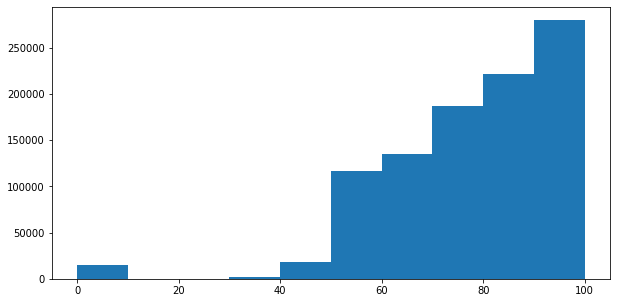

In [8]:
ac_pl_38_outcome_df_1 = ac_pl_38_outcome_df[ac_pl_38_outcome_df['outcome'] == 1]
plt.figure(figsize=(10,5))
plt.hist(ac_pl_38_outcome_df_1['char_38'])
# ac_pl_38_outcome_df_1.describe()

In [9]:
# ac.memory_usage()

In [100]:
# pl.columns

In [99]:
# ac.columns

In [12]:
# ac.describe()
# ac.outcome.isnull().sum()
# for i in ac.columns:
#     i.isnull().sum()
ac.isnull().sum() , ac.shape
ac.shape[0] - ac.outcome.notnull().sum()
ac.shape[0] - ac.char_1.isnull().sum()

157615

In [13]:
# for i in ac.columns:
#     ac.columns[i],ac.shape[0] - ac[i].isnull().sum()
# ac.outcome.value_counts().plot(kind='bar')

In [14]:
for i in ac:
    print('Unique Elements: ', i,":",ac[i].nunique())
# ac.char_1.unique()

Unique Elements:  people_id : 151295
Unique Elements:  activity_id : 2197291
Unique Elements:  date : 411
Unique Elements:  activity_category : 7
Unique Elements:  char_1 : 51
Unique Elements:  char_2 : 32
Unique Elements:  char_3 : 11
Unique Elements:  char_4 : 7
Unique Elements:  char_5 : 7
Unique Elements:  char_6 : 5
Unique Elements:  char_7 : 8
Unique Elements:  char_8 : 18
Unique Elements:  char_9 : 19
Unique Elements:  char_10 : 6515
Unique Elements:  outcome : 2


In [15]:
for i in pl:
    print('Unique Elements: ', i,":",pl[i].nunique())

Unique Elements:  people_id : 189118
Unique Elements:  char_1 : 2
Unique Elements:  group_1 : 34224
Unique Elements:  char_2 : 3
Unique Elements:  date : 1196
Unique Elements:  char_3 : 43
Unique Elements:  char_4 : 25
Unique Elements:  char_5 : 9
Unique Elements:  char_6 : 7
Unique Elements:  char_7 : 25
Unique Elements:  char_8 : 8
Unique Elements:  char_9 : 9
Unique Elements:  char_10 : 2
Unique Elements:  char_11 : 2
Unique Elements:  char_12 : 2
Unique Elements:  char_13 : 2
Unique Elements:  char_14 : 2
Unique Elements:  char_15 : 2
Unique Elements:  char_16 : 2
Unique Elements:  char_17 : 2
Unique Elements:  char_18 : 2
Unique Elements:  char_19 : 2
Unique Elements:  char_20 : 2
Unique Elements:  char_21 : 2
Unique Elements:  char_22 : 2
Unique Elements:  char_23 : 2
Unique Elements:  char_24 : 2
Unique Elements:  char_25 : 2
Unique Elements:  char_26 : 2
Unique Elements:  char_27 : 2
Unique Elements:  char_28 : 2
Unique Elements:  char_29 : 2
Unique Elements:  char_30 : 2
Uniqu

In [16]:
for i in ac:
    print('No. of Null', i,":",ac[i].isnull().sum())

No. of Null people_id : 0
No. of Null activity_id : 0
No. of Null date : 0
No. of Null activity_category : 0
No. of Null char_1 : 2039676
No. of Null char_2 : 2039676
No. of Null char_3 : 2039676
No. of Null char_4 : 2039676
No. of Null char_5 : 2039676
No. of Null char_6 : 2039676
No. of Null char_7 : 2039676
No. of Null char_8 : 2039676
No. of Null char_9 : 2039676
No. of Null char_10 : 157615
No. of Null outcome : 0


In [17]:
# for i in pl:
#     print('No. of Null', i,pl[i].isnull().sum())    #All good, no missing values

In [98]:
# ac.activity_category.unique()
# ac.char_1.value_counts()
# ac.columns

In [19]:
ac.groupby('outcome')['char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10'].count()

,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
outcome,,,,,,,,,,
0,92784,92784,92784,92784,92784,92784,92784,92784,92784,1129010
1,64831,64831,64831,64831,64831,64831,64831,64831,64831,910666


In [20]:
ac.groupby(['outcome','activity_category'])['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8','char_9', 'char_10'].count()

char_1  char_2  char_3  char_4  char_5  char_6  \
outcome activity_category                                                   
0       type 1              92784   92784   92784   92784   92784   92784   
        type 2                  0       0       0       0       0       0   
        type 3                  0       0       0       0       0       0   
        type 4                  0       0       0       0       0       0   
        type 5                  0       0       0       0       0       0   
        type 6                  0       0       0       0       0       0   
        type 7                  0       0       0       0       0       0   
1       type 1              64831   64831   64831   64831   64831   64831   
        type 2                  0       0       0       0       0       0   
        type 3                  0       0       0       0       0       0   
        type 4                  0       0       0       0       0       0   
        type 5                  0       0       0       0       0       0   
        type 6                  0       0       0       0       0       0   
        type 7                  0       0       0       0       0       0   

                           char_7  char_8  char_9  char_10  
outcome activity_category                                   
0       type 1              92784   92784   92784        0  
        type 2                  0       0       0   443002  
        type 3                  0       0       0   321202  
        type 4                  0       0       0   105972  
        type 5                  0       0       0   255050  
        type 6                  0       0       0     1889  
        type 7                  0       0       0     1895  
1       type 1              64831   64831   64831        0  
        type 2                  0       0       0   461681  
        type 3                  0       0       0   108206  
        type 4                  0       0       0   101493  
        type 5                  0       0       0   235660  
        type 6                  0       0       0     2364  
        type 7                  0       0       0     1262

In [21]:
ac.groupby(['activity_category','outcome'])['char_1','char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8','char_9', 'char_10'].count()

char_1  char_2  char_3  char_4  char_5  char_6  \
activity_category outcome                                                   
type 1            0         92784   92784   92784   92784   92784   92784   
                  1         64831   64831   64831   64831   64831   64831   
type 2            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 3            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 4            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 5            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 6            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 7            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   

                           char_7  char_8  char_9  char_10  
activity_category outcome                                   
type 1            0         92784   92784   92784        0  
                  1         64831   64831   64831        0  
type 2            0             0       0       0   443002  
                  1             0       0       0   461681  
type 3            0             0       0       0   321202  
                  1             0       0       0   108206  
type 4            0             0       0       0   105972  
                  1             0       0       0   101493  
type 5            0             0       0       0   255050  
                  1             0       0       0   235660  
type 6            0             0       0       0     1889  
                  1             0       0       0     2364  
type 7            0             0       0       0     1895  
                  1             0       0       0     1262

In [22]:
type_outcome = ac.groupby(['activity_category','outcome'])['people_id'].count().reset_index()
type_outcome.columns=['activity_category','outcome','count']
type_outcome

,activity_category,outcome,count
0,type 1,0,92784
1,type 1,1,64831
2,type 2,0,443002
3,type 2,1,461681
4,type 3,0,321202
5,type 3,1,108206
6,type 4,0,105972
7,type 4,1,101493
8,type 5,0,255050
9,type 5,1,235660


In [97]:
# sns.countplot('outcome', data=ac)
# ax

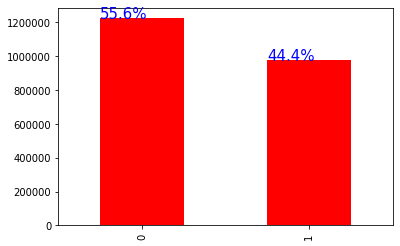

In [96]:
ax=ac.outcome.value_counts().plot(kind='bar', color='red')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.0, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='blue')

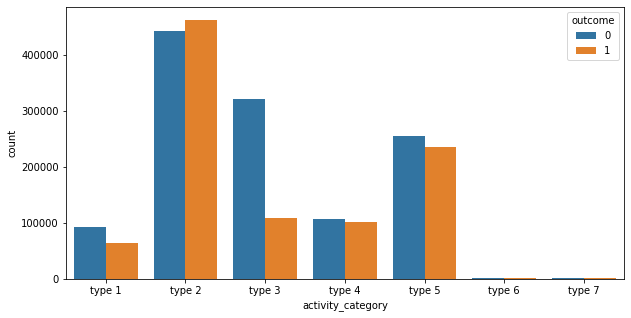

In [25]:
# ac.groupby(['activity_category','outcome'])['people_id'].count().reset_index().plot(kind='bar', stacked=True)
# ac.groupby(['activity_category'])['outcome'].count().reset_index().plot(kind='bar')
plt.figure(figsize=(10,5))
sns.barplot('activity_category', 'count', data=type_outcome, ci=False, hue='outcome')

In [94]:
# sns.countplot('activity_category', data=ac, hue='outcome')

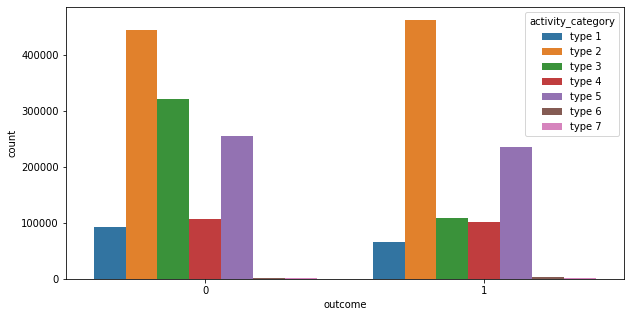

In [26]:
# sns.barplot('activity_category', 'people_id', data=type_outcome, ci=False,  hue='outcome',stacked=True)
# type_outcome.plot(kind='bar', stacked=True)
plt.figure(figsize=(10,5))
sns.barplot('outcome', 'count', data=type_outcome, ci=False, hue='activity_category')

In [27]:
ac.groupby(['activity_category','outcome'])['char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
       'char_9', 'char_10'].count()

char_1  char_2  char_3  char_4  char_5  char_6  \
activity_category outcome                                                   
type 1            0         92784   92784   92784   92784   92784   92784   
                  1         64831   64831   64831   64831   64831   64831   
type 2            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 3            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 4            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 5            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 6            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   
type 7            0             0       0       0       0       0       0   
                  1             0       0       0       0       0       0   

                           char_7  char_8  char_9  char_10  
activity_category outcome                                   
type 1            0         92784   92784   92784        0  
                  1         64831   64831   64831        0  
type 2            0             0       0       0   443002  
                  1             0       0       0   461681  
type 3            0             0       0       0   321202  
                  1             0       0       0   108206  
type 4            0             0       0       0   105972  
                  1             0       0       0   101493  
type 5            0             0       0       0   255050  
                  1             0       0       0   235660  
type 6            0             0       0       0     1889  
                  1             0       0       0     2364  
type 7            0             0       0       0     1895  
                  1             0       0       0     1262

In [28]:
pl.head(1)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36


In [137]:
# ac[ac.people_id.value_counts().head(32).reset_index()['index']]
repeated_customer=ac.people_id.value_counts().head(500).reset_index()
# ac.loc[ac.people_id == ac[ac.people_id.value_counts().head(32).reset_index()['index']]]
# mask1= ac[ac['people_id'] == ac.people_id.value_counts().head(32).reset_index().head(1)['index']]
# ac.loc[ac.people_id == ac.people_id.value_counts().head(32).reset_index().head(1)['index'],:]
repeated_customer.people_id.sum()
# for i in mask:
#     if i in ac['people_id']:
#         print(ac[i])
ac.loc[ac.people_id == "ppl_247868",]['outcome'].value_counts()

0    193
Name: outcome, dtype: int64

In [136]:
repeated_customer

,index,people_id
0,ppl_294918,55103
1,ppl_370270,53668
2,ppl_105739,45936
3,ppl_54699,23969
4,ppl_64887,7052
...,...,...
495,ppl_245012,193
496,ppl_369852,193
497,ppl_134086,193
498,ppl_263024,193


In [153]:
customer_count = ac.people_id.value_counts().reset_index()
customer_count.columns=['cust_id', 'No_act']
customer_count.shape[0]
one_time_customer = customer_count[customer_count['No_act'] < 2].count()
repeated_customer = customer_count[customer_count['No_act'] > 1].count()
one_time_customer, repeated_customer

(cust_id    24726
 No_act     24726
 dtype: int64, cust_id    126569
 No_act     126569
 dtype: int64)

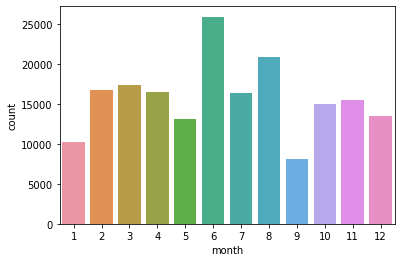

In [30]:
pl_month_count = pl.date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
pl_month_count.columns=['month', 'count']
sns.barplot('month', 'count', data=pl_month_count)

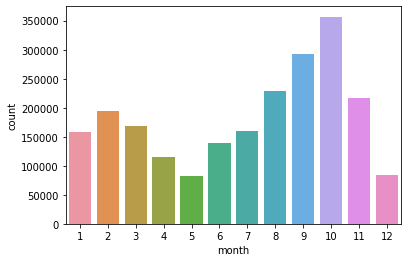

In [31]:
ac_month_count = ac.date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
ac_month_count.columns=['month', 'count']
sns.barplot('month', 'count', data=ac_month_count)

In [32]:
df_outcome_1=ac[ac['outcome'] == 1]
df_outcome_1.shape
df_outcome_0=ac[ac['outcome'] == 0]
df_outcome_0.shape


(1221794, 15)

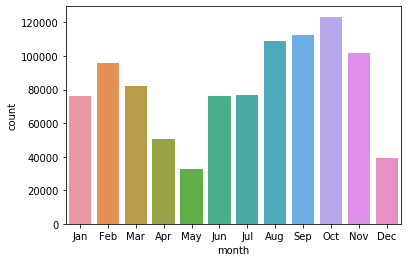

In [90]:
df_outcome_1_month_count = df_outcome_1.date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
df_outcome_1_month_count.columns=['month', 'count']
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_outcome_1_month_count.month = df_outcome_1_month_count.month.replace(month_map)
sns.barplot('month', 'count', data=df_outcome_1_month_count)

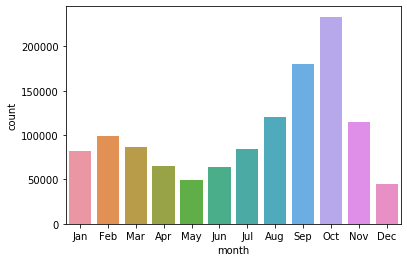

In [91]:
df_outcome_0_month_count = df_outcome_0.date.dt.month.value_counts().sort_values().reset_index().sort_values('index')
df_outcome_0_month_count.columns=['month', 'count']
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df_outcome_0_month_count.month = df_outcome_0_month_count.month.replace(month_map)
sns.barplot('month', 'count', data=df_outcome_0_month_count)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

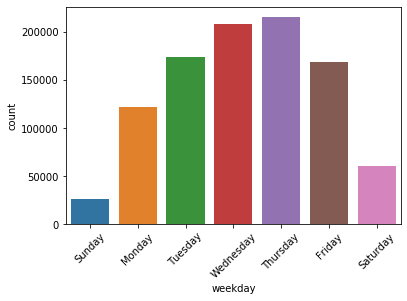

In [92]:
df_outcome_1_weekday_count = df_outcome_1.date.dt.weekday.value_counts().sort_values().reset_index().sort_values('index') # Sunday is 0.
df_outcome_1_weekday_count.columns=['weekday', 'count']
# df_outcome_1_weekday_count.weekday.replace(0,'Monday')
weekday_map = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
df_outcome_1_weekday_count.weekday = df_outcome_1_weekday_count.weekday.replace(weekday_map)

sns.barplot('weekday', 'count', data=df_outcome_1_weekday_count)
plt.xticks(rotation = 45)
# df_outcome_1_weekday_count

In [35]:
# ac.groupby(['activity_category','outcome']).count()
pl.date.dt.year.value_counts().sort_values()
# pl.date.dt.year.value_counts().sort_values().plot(kind='bar')
ac.outcome.value_counts()

0    1221794
1     975497
Name: outcome, dtype: int64

Text(0.5, 1.0, 'Activities Count by Year')

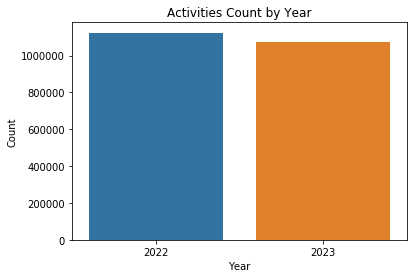

In [36]:
# ac.groupby(['outcome'])['char_1',
#        'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
# #        'char_9', 'char_10'].count().plot(kind='bar', stacked=True)
# ac.date.dt.year.value_counts().reset_index().plot(kind='bar')
ac_date_year=ac.date.dt.year.value_counts().reset_index()
sns.barplot('index', 'date',data=ac_date_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Activities Count by Year')

Text(0.5, 1.0, 'Activities Count by Year')

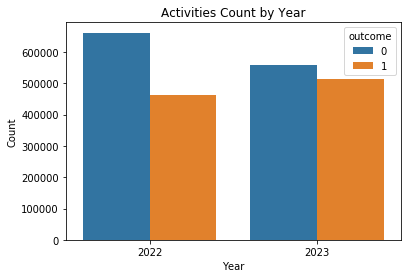

In [87]:
# ac_date_year=ac.date.dt.year.value_counts().reset_index()
sns.countplot(ac['date'].dt.year, data=ac, hue='outcome')
# sns.barplot('index', 'date',data=ac_date_year)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Activities Count by Year')

In [37]:
# sns.barplot(ac['date'].dt.year, 'people_id', data=ac, hue='outcome')

In [38]:
ac.groupby(['outcome','activity_category'])['char_1',
       'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8',
#        'char_9', 'char_10'].count().plot(kind='bar', stacked=True)

SyntaxError: unexpected EOF while parsing (<ipython-input-38-fd7b321a8c73>, line 3)

In [ ]:
ac.activity_category.unique()

In [ ]:
ac.char_10.nunique()

In [ ]:
for i in ac:
    print('No. of Null', i,ac[i].isnull().sum())